# Propagation in an elevated duct


In [1]:
import os
os.chdir('../../../')
from rwp.environment import *
from rwp.sspade import *
from rwp.vis import *

Preparing environment

In [2]:
environment = Troposphere()
environment.terrain = Terrain(ground_material=WetGround())
max_range = 150e3

Specifying the elevated duct M-profile

In [3]:
profile1d = interp1d(x=[0, 100, 150, 300], y=[0, 32, 10, 45], fill_value="extrapolate")
environment.M_profile = lambda x, z: profile1d(z)

Preparing transmitting antenna

In [4]:
antenna = GaussAntenna(wavelength=0.1, height=30, beam_width=2, elevation_angle=0, polarz='H')

Calculating the electromagnetic field

In [5]:
propagator = TroposphericRadioWaveSSPadePropagator(antenna=antenna, env=environment, max_range_m=max_range)
field = propagator.calculate()

Visualising results

In [6]:
vis = FieldVisualiser(field, env=environment, trans_func=lambda v: 10 * cm.log10(1e-16 + abs(v)), label='Pade + Transparent BC', x_mult=1E-3)

Amplitude of the field along axis x at the height z = 30 m

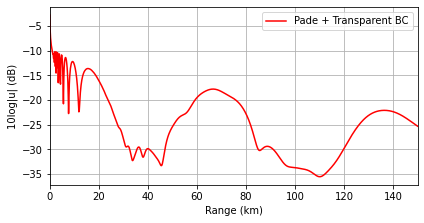

In [7]:
plt = vis.plot_hor(30)
plt.xlabel('Range (km)')
plt.ylabel('10log|u| (dB)')
plt.grid(True)
plt.tight_layout()
plt.show()

Two dimensional distribution of the field amplitude

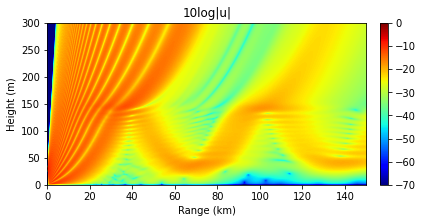

In [8]:
plt = vis.plot2d(min=-70, max=0)
plt.title('10log|u|')
plt.xlabel('Range (km)')
plt.ylabel('Height (m)')
plt.tight_layout()
plt.show()